### Importing Libraries and Data

In [28]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [29]:
# Configure API key 

quandl.ApiConfig.api_key = 'tfzChtqwgfbcub1A6zzq'

In [30]:
import requests
url = 'https://www.quandl.com/api/v3/datasets/FRED/NROU.json?api_key=tfzChtqwgfbcub1A6zzq'
response = requests.get(url)
print(response.status_code)
print(response.text)

403
<html style="height:100%"><head><META NAME="ROBOTS" CONTENT="NOINDEX, NOFOLLOW"><meta name="format-detection" content="telephone=no"><meta name="viewport" content="initial-scale=1.0"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><script type="text/javascript" src="/_Incapsula_Resource?SWJIYLWA=719d34d31c8e3a6e6fffd425f7e032f3"></script></head><body style="margin:0px;height:100%"><iframe id="main-iframe" src="/_Incapsula_Resource?CWUDNSAI=23&xinfo=16-120270251-0%200NNN%20RT%281751059259167%20583%29%20q%280%20-1%20-1%202%29%20r%281%20-1%29%20B15%2811%2c3946292%2c0%29%20U18&incident_id=6524000360238982667-619041019848821008&edet=15&cinfo=0b000000&rpinfo=0&mth=GET" frameborder=0 width="100%" height="100%" marginheight="0px" marginwidth="0px">Request unsuccessful. Incapsula incident ID: 6524000360238982667-619041019848821008</iframe></body></html>


### Not Successful. 
##### I used this data set (https://huggingface.co/datasets/HHS-Official/autism-prevalence-studies)

In [31]:
!pip show fsspec s3fs


Name: fsspec
Version: 2025.3.2
Summary: File-system specification
Home-page: https://github.com/fsspec/filesystem_spec
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2018, Martin Durant
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS

In [32]:
from datasets import load_dataset
dataset = load_dataset("HHS-Official/autism-prevalence-studies")
# Convert to pandas DataFrame
df = dataset['train'].to_pandas()


In [33]:
# Ignoring the warning 
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

In [34]:
df.info()
df.describe()
df.isnull().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Author                                            207 non-null    object 
 1   Title                                             207 non-null    object 
 2   Year Published                                    207 non-null    int64  
 3   Country                                           207 non-null    object 
 4   Area(s)                                           202 non-null    object 
 5   Age Range                                         202 non-null    object 
 6   Study Years                                       185 non-null    object 
 7   Case Identification Method                        207 non-null    object 
 8   Case Criterion                                    207 non-null    object 
 9   Sample Size          

,Author,Title,Year Published,Country,Area(s),Age Range,Study Years,Case Identification Method,Case Criterion,Sample Size,...,Diagnosis Age Range (months),Diagnosis Mean Age (months),Diagnosis Median Age (months),IQ Score <70 (%),Adaptive Score <70 (%),Non-Verbal or Minimally Verbal (%),Percentage of Individual Co-occurring Conditions,Autism Types Included,Link to Publication,CDC Calculated Values
0,Lotter,Epidemiology of Autistic Conditions in Young C...,1966,England,County of Middlesex,8 to 10,1964,survey (mail); health records,Kanner,78000.0,...,None,NaN,None,84.0,NaN,59.0,None,autistic conditions,https://link.springer.com/article/10.1007/BF00...,IQ Score <70 (%); CI
1,Treffert,Epidemiology of infantile Autism,1970,USA,Wisconsin,2 to 12,1962-1967,health records,Kanner,899750.0,...,None,NaN,None,NaN,NaN,NaN,None,classic infantile autism,https://www.ncbi.nlm.nih.gov/pubmed/5436867,CI
2,Brask,A Prevalence investigation of Childhood Psychoses,1972,Denmark,Åarhus County,2 to 14,1962,health records; service provider records,clinical interpretation,46500.0,...,None,NaN,None,NaN,NaN,NaN,None,autistic syndrome,None,CI
3,"Wing, et al.",The prevalence of early childhood autism: comp...,1976,England,Camberwall,5 to 14,1974,registry; survey (unspecified),clinical interpretation,25000.0,...,None,NaN,None,NaN,NaN,NaN,None,early childhood autism,https://pubmed.ncbi.nlm.nih.gov/935299/,CI
4,"Wing, et al.",Severe impairments of social interaction and a...,1979,England,Camberwell,0 to 14,1970,registry; service provider records,Kanner; clinical interpretation,35000.0,...,None,NaN,None,70.0,NaN,59.0,0 (Down syndrome),autism,https://www.ncbi.nlm.nih.gov/pubmed/155684,IQ Score <70 (%); CI


### Cleaning Data

In [35]:
# Step 1: Rename columns for convenience
df.rename(columns={
    'Year Published': 'year',
    'Country': 'country',
    'ASD Prevalence Estimate per 1,000': 'prevalence_per_1000'
}, inplace=True)

# Step 2: Filter for U.S. studies
us_df = df[df['country'] == 'USA'].copy()

# Step 3: Select only the necessary columns
us_df = us_df[['year', 'prevalence_per_1000']]

# Step 4: Drop missing values and sort chronologically
us_df.dropna(inplace=True)
us_df.sort_values('year', inplace=True)

# Replace 'df' with your actual DataFrame name
df.to_csv(r"C:\Users\nabar\OneDrive\Documents\A6 Project\02 Data\Prepared Data\autism_prevalence.csv", index=False)

# Step 5: Convert year to datetime and set as index
import pandas as pd
us_df['year'] = pd.to_datetime(us_df['year'], format='%Y')
us_df.set_index('year', inplace=True)

In [36]:
# Check structure, index, and content
us_df.info()
us_df.describe()
us_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 1970-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   prevalence_per_1000  59 non-null     float64
dtypes: float64(1)
memory usage: 944.0 bytes


,prevalence_per_1000
year,
1970-01-01,0.077
1987-01-01,0.330
1989-01-01,0.357
1999-01-01,0.380
2000-01-01,0.140


### Decomposition

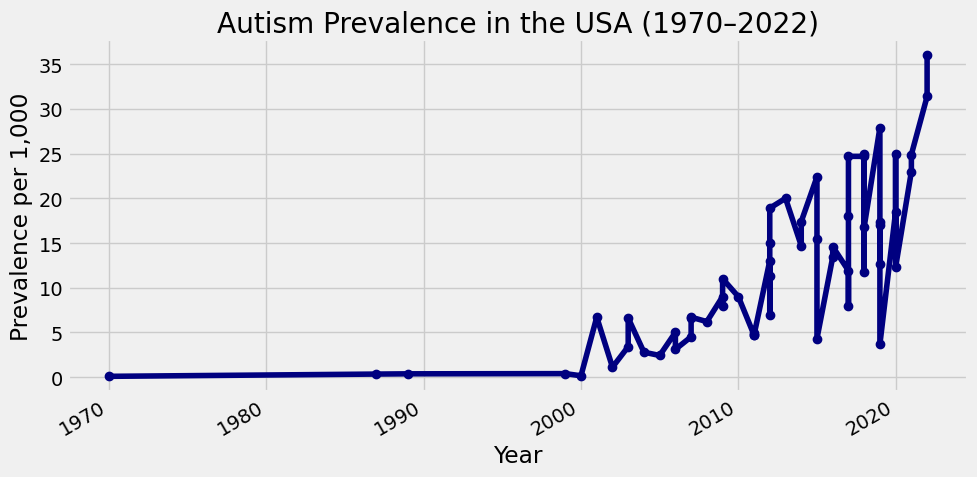

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
us_df['prevalence_per_1000'].plot(marker='o', linestyle='-', color='navy')
plt.title("Autism Prevalence in the USA (1970–2022)")
plt.xlabel("Year")
plt.ylabel("Prevalence per 1,000")
plt.grid(True)
plt.tight_layout()
plt.show()

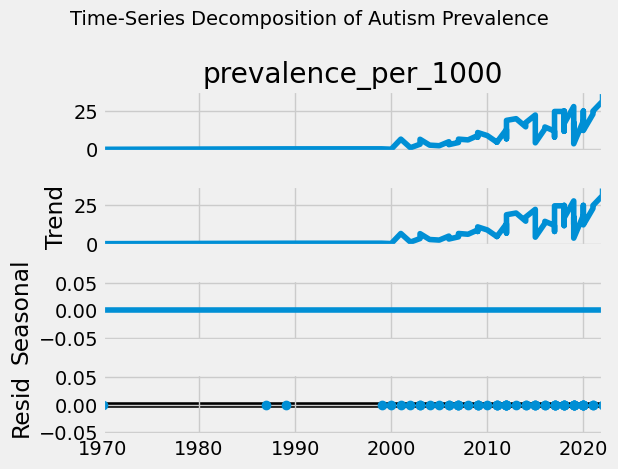

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(us_df['prevalence_per_1000'], model='additive', period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot all components
decomposition.plot()
plt.suptitle("Time-Series Decomposition of Autism Prevalence", fontsize=14)
plt.tight_layout()
plt.show()

#### Observation: 

**Clearly increasing autism prevalence from 1970 to 2020.
- Trend: Smooth upward progression confirming long-term growth.
- Seasonal: Flatlined at zero—expected, since the data is annual and seasonality isn’t present.
- Residuals: Small fluctuations, suggesting minimal random noise.


### Test for Stationarity Using the Dickey-Fuller Test

In [39]:
from statsmodels.tsa.stattools import adfuller

# Drop missing values from the trend series (or use the original if it's clean)
adf_result = adfuller(us_df['prevalence_per_1000'].dropna())

# Print results
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
for key, value in adf_result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Statistic: -0.6656696027426687
p-value: 0.8554426485039666
Critical Value (1%): -3.5778480370438146
Critical Value (5%): -2.925338105429433
Critical Value (10%): -2.6007735310095064


#### Stationarity Check :
To determine whether the original autism prevalence time series is stationary, we used the Augmented Dickey-Fuller (ADF) test. The test evaluates the following:
Null Hypothesis (H₀): The series is non-stationary
Alternative Hypothesis (H₁): The series is stationary

ADF Test Results (Original Series):
- ADF Statistic: -0.666
- p-value: 0.855
- Critical Values:
- 1%: -3.578
- 5%: -2.925
- 10%: -2.601

##### Interpretation:
Since the p-value (0.855) is much greater than 0.05, we fail to reject the null hypothesis. This means the original time series is not stationary and likely exhibits a trend over time. As a result, differencing is required to stabilize the mean and proceed with time-series modeling.







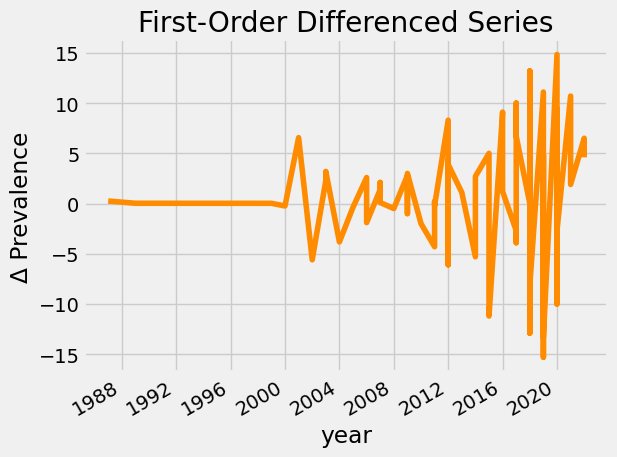

In [40]:
# First-order differencing
diff_1 = us_df['prevalence_per_1000'].diff().dropna()

# Visualize the differenced series
diff_1.plot(title='First-Order Differenced Series', color='darkorange')
plt.ylabel('Δ Prevalence')
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
plt.savefig(r'C:\Users\nabar\OneDrive\Documents\A6 Project\04 Analysis\Visualization\figgg.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

### Interpretation of First-Order Differencing:
The plot of the first-order differenced autism prevalence series shows fluctuations around a relatively stable mean, without a strong upward or downward trend. This suggests that the differencing step successfully removed the long-term trend component observed in the original series.
Key observations:
- The differenced values oscillate above and below zero, indicating mean stabilization.
- Larger fluctuations post-2000 may reflect policy shifts, increased diagnostic awareness, or sampling variability—worth noting in the discussion section.
- No strong seasonal pattern is visible, which aligns with expectations given the annual frequency of the data.
This transformation makes the series more likely to satisfy the assumptions of stationarity—confirmed next using the Augmented Dickey-Fuller test.



In [42]:
from statsmodels.tsa.stattools import adfuller

adf_result_diff1 = adfuller(diff_1)
print(f'ADF Statistic: {adf_result_diff1[0]}')
print(f'p-value: {adf_result_diff1[1]}')
for key, value in adf_result_diff1[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Statistic: -4.079665378623673
p-value: 0.0010462583728369998
Critical Value (1%): -3.5812576580093696
Critical Value (5%): -2.9267849124681518
Critical Value (10%): -2.6015409829867675


#### ADF Test Results – First-Order Differenced Series:
To assess whether the transformed series is stationary, we performed the Augmented Dickey-Fuller (ADF) test:

* Null Hypothesis (H₀): The series is non-stationary
* Alternative Hypothesis (H₁): The series is stationary

Test Output:
- ADF Statistic: -4.080
- p-value: 0.0010
- Critical Values:
- 1%: -3.581
- 5%: -2.927
- 10%: -2.602
Interpretation:
Since the p-value is less than 0.05, we reject the null hypothesis and conclude that the first-order differenced series is stationary. This validates the transformation and prepares the series for further modeling, such as autocorrelation analysis and forecasting with ARIMA models.


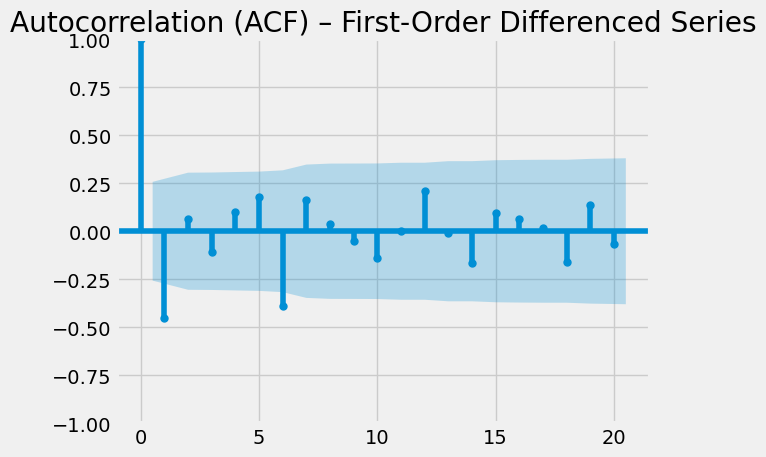

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation (ACF)
plot_acf(diff_1, lags=20)
plt.title("Autocorrelation (ACF) – First-Order Differenced Series")
plt.tight_layout()
plt.show()


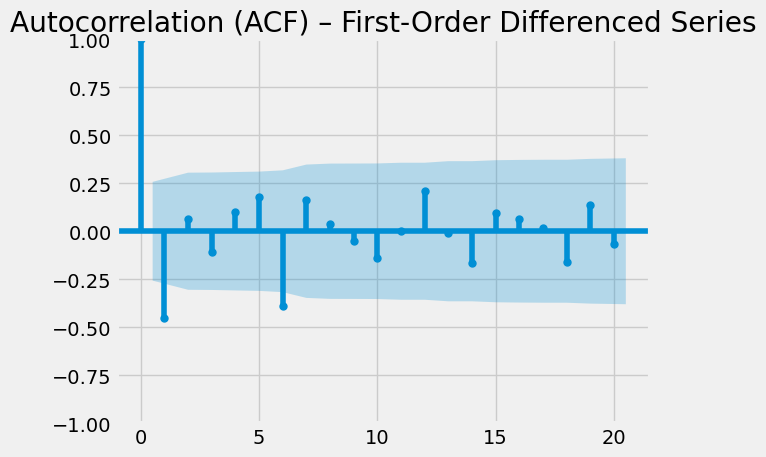

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(diff_1, lags=20)
plt.title("Autocorrelation (ACF) – First-Order Differenced Series")
plt.tight_layout()
fig.savefig(r'C:\Users\nabar\OneDrive\Documents\A6 Project\04 Analysis\Visualization\acf_differenced.png', dpi=300, bbox_inches='tight')

### Interpretation of the ACF Plot (First-Order Differenced Series):
- Significant spike at lag 1: This suggests that the first lag is meaningfully correlated with the current value.
- Gradual decay after lag 1: The autocorrelation drops off more slowly, which is typical of an autoregressive structure (AR).
- No strong seasonal pattern: As expected from annual data, there’s no regular repeating behavior.



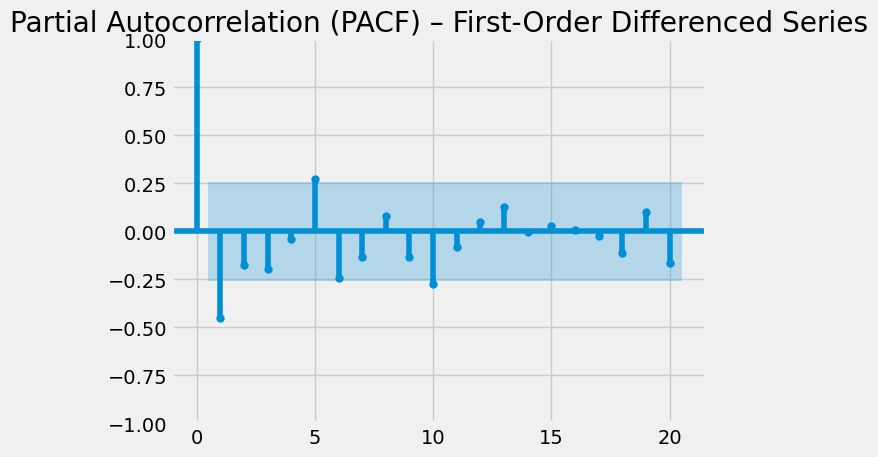

In [45]:
# Partial Autocorrelation (PACF)
plot_pacf(diff_1, lags=20, method='ywm')  # 'ywm' avoids warnings from newer versions
plt.title("Partial Autocorrelation (PACF) – First-Order Differenced Series")
plt.tight_layout()
plt.show()


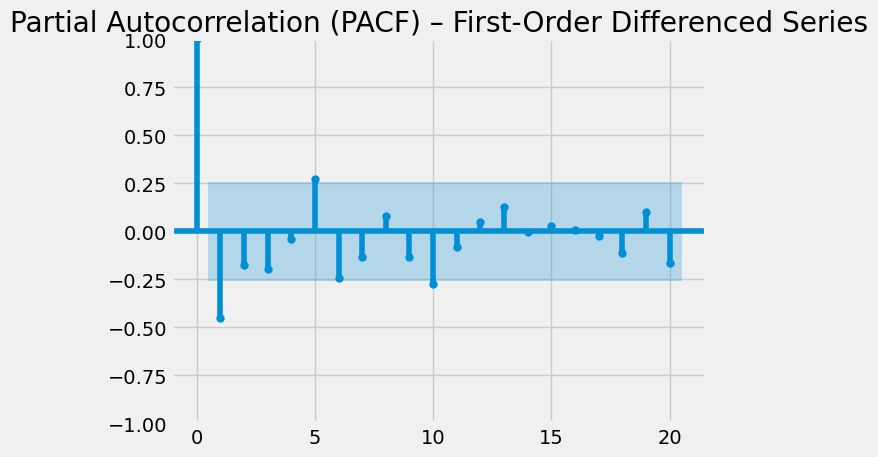

In [46]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

fig = plot_pacf(diff_1, lags=20, method='ywm')
plt.title("Partial Autocorrelation (PACF) – First-Order Differenced Series")
plt.tight_layout()

fig.savefig(r'C:\Users\nabar\OneDrive\Documents\A6 Project\04 Analysis\Visualization\pacf_differenced.png', dpi=300, bbox_inches='tight')
plt.show()

### Interpretation of PACF – First-Order Differenced Series:
- Significant spike at lag 1: This indicates a strong partial autocorrelation at lag 1, suggesting that the current differenced value depends heavily on the previous one.
- All other lags fall within the confidence interval: No meaningful partial autocorrelation beyond lag 1, which means the impact of earlier lags is minimal after accounting for lag 1.


### Check out what the differencing did to the time-series curve


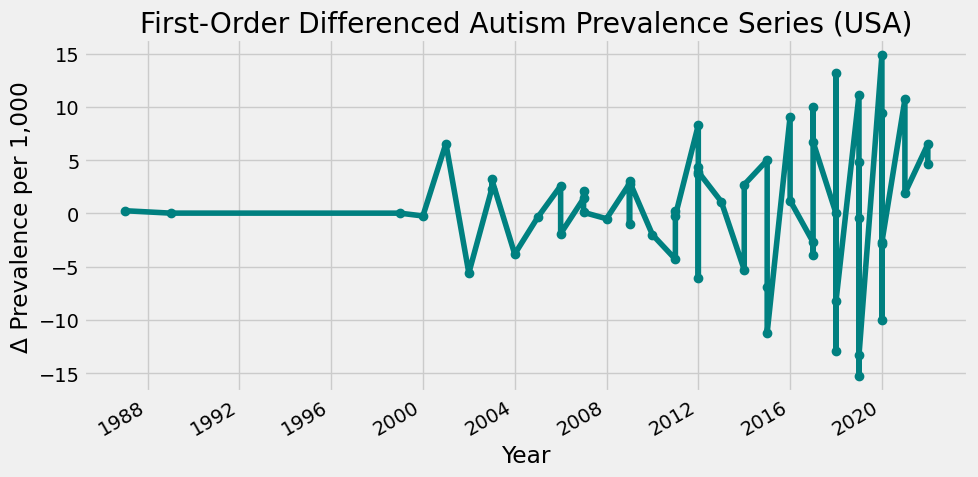

In [47]:

plt.figure(figsize=(10, 5))
diff_1.plot(color='teal', marker='o', linestyle='-')
plt.title("First-Order Differenced Autism Prevalence Series (USA)")
plt.xlabel("Year")
plt.ylabel("Δ Prevalence per 1,000")
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretation of First-Order Differencing Plot:
This graph shows the year-to-year changes in autism prevalence per 1,000 children in the U.S., rather than the overall trend. By differencing the original series, you've effectively transformed it into a stationary series that fluctuates around a stable mean, enabling time-series modeling.
What stands out:
- Sharp increases in prevalence between 2000–2010, possibly due to expanded diagnostic criteria or increased surveillance.
- Relative stabilization in some periods, interspersed with pronounced spikes—pointing to policy, research, or healthcare shifts influencing estimates.
- No visible recurring seasonal patterns, as expected from annual data.


<Figure size 800x400 with 0 Axes>

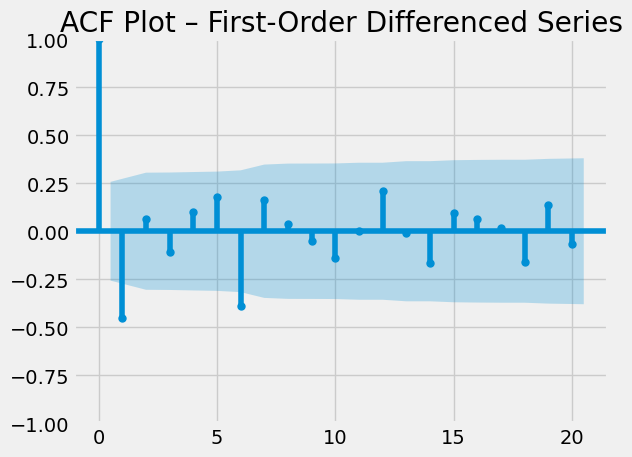

In [48]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plot_acf(diff_1, lags=20)
plt.title("ACF Plot – First-Order Differenced Series")
plt.tight_layout()
plt.show()

- The differencing successfully removed the trend and stabilized the series.
- The significance at lag 1 with a quick drop-off supports the choice of an AR(1) process.
